In [52]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as iter

In [53]:
estados = np.array([0,1]) 
P_dato =  np.array([0.2,0.8])

In [54]:
#prob truncada y no truncada
T = np.array([[0.8,0.2],[0.2,0.8]])

E = np.array([[0.5,0.9],[0.5,0.1]])

In [55]:
#asignacion de nombres a los eventos
DictH = {0:'Justa',1:'Truncada'}
DictO = {0:'Cara',1:'Sello'}

In [56]:
o = np.array([1,0,0,0,1,0,1,0])

In [57]:
def GetHiddenStates(States, N):
    CStates = list( iter.combinations_with_replacement(States,N) )
    Permu = []
    for it in CStates:
        p = list(iter.permutations(it,N))
        for i in p:
            if i not in Permu:
                Permu.append(i)
    print(CStates)
    return np.array(Permu)

In [58]:
def GetProb(T,E,Obs,State,Prior):
    n = len(Obs)
    p = 1.
    p *= Prior[State[0] ]
    for i in range(n-1):
        p *= T[ State[i+1], State[i] ]
    for i in range(n):
        p *= E[ Obs[i], State[i] ]
    return p

In [59]:
HStates = GetHiddenStates(estados,8)
dim = HStates.shape[0]
P = np.zeros(dim)

for i in range(dim):
    P[i] = GetProb(T,E,o,HStates[i],P_dato)

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


In [60]:
#P mas comun
maxP = np.max(P)
ii = np.where( P == np.amax(P))
print(HStates[ii],maxP)

[[1 1 1 1 0 0 0 0]] 0.0001911029760000001


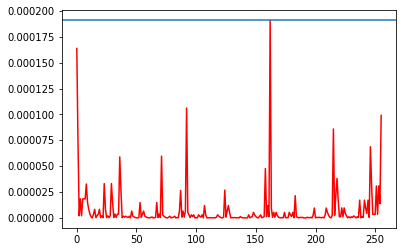

In [61]:
plt.plot(P,color='r')
plt.axhline(y=maxP)

In [62]:
#suma de las p de todas las posibilidades de combinatoria
HStates_all = GetHiddenStates(estados,8)
ObservedStates = HStates_all
D = HStates_all.shape[0]
P = np.zeros(dim) 

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


In [63]:
for i in range(D):
    P[i] = GetProb(T,E,o,HStates_all[i],P_dato)
P_i = np.zeros((D, D))
for j in range(D):
  o = ObservedStates[j]
  for i in range(D):
      P_i[i][j] = GetProb(T,E,o,HStates_all[i],P_dato)
total_p = np.sum(P_i)

In [64]:
print(total_p,round(total_p,3)) # ese 4 al final se debe a errores de aproximación

1.0000000000000004 1.0
